In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
data = pd.read_csv("/content/HR_comma_sep.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
data.count()

satisfaction_level       14999
last_evaluation          14999
number_project           14999
average_montly_hours     14999
time_spend_company       14999
Work_accident            14999
left                     14999
promotion_last_5years    14999
Department               14999
salary                   14999
dtype: int64

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.shape

(14999, 10)

[]

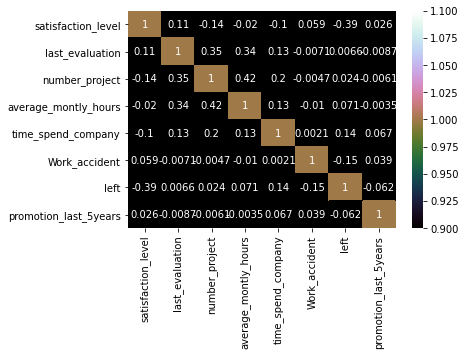

In [ ]:
cm = data.corr()
ax=sns.heatmap(cm,vmin=1,vmax=1,annot=True,cmap='cubehelix')
ax.plot()


In [ ]:
data['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [ ]:
data = pd.get_dummies(data)

In [ ]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [ ]:
x = data.drop('left',axis=1)

In [ ]:
y =  data['left']

In [ ]:
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [ ]:
Pca = PCA()

In [ ]:
pca = Pca.fit(x)

Text(0, 0.5, 'cumlativ explained_variance')

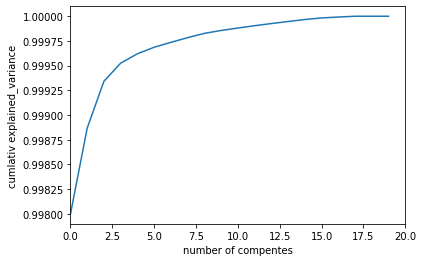

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,20,1)
plt.xlabel("number of compentes")
plt.ylabel('cumlativ explained_variance')

In [ ]:
pca.explained_variance_ratio_

array([9.97999534e-01, 8.69342838e-04, 4.73823077e-04, 1.82844960e-04,
       9.48675250e-05, 6.57917451e-05, 4.97732563e-05, 4.75824037e-05,
       4.31762170e-05, 2.95275424e-05, 2.43750795e-05, 2.35352048e-05,
       2.19498321e-05, 2.05957900e-05, 1.99451143e-05, 1.61590763e-05,
       9.25180505e-06, 7.92421462e-06, 4.94800145e-36, 1.01394743e-36])

In [ ]:
num_of_pca = PCA(n_components = 10)
x = num_of_pca.fit_transform(x)

In [ ]:
x.shape

(14999, 10)

In [ ]:
model = SVC()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state=42,stratify = y)

In [ ]:
# parameter = {'C':[0.001,0.1],'gamma': [0.1],'kernal':['rbf']}

In [ ]:
# param_grid = {'estimator__C': [ 1, 10, 100, 1000],  
#               'estimator__gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#               'estimator__kernel': ['rbf']}  

In [ ]:
# Parameters = [{'kernel': ['rbf'], 'gamma': [0.1,0.2,0.5,0.75,1,2,3,4,5],
#                      'C': [0.1,0.2,0.5,0.75,1,2,3,4,5]},
#                     {'kernel': ['linear'], 'C': [1,10]}]

In [ ]:
grid = GridSearchCV(model,Parameters,cv=5)

In [ ]:
grid.fit(x_train,y_train)